<a href="https://colab.research.google.com/github/MayBornWitIt/Machine_Learning/blob/main/Project_2_Part_3_%5BCore%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

In [2]:
#Load the Data
df = pd.read_csv('/content/drive/MyDrive/adult.csv.zip')

In [3]:
# Display the first (5) rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [5]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") ## or 'object'

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="object") # or 'number'

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [9]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# Confirm now duplicate rows remain
df.duplicated().sum()

0

- Check unique values in each column
- Address & remove missing/ inconsistent values.

In [11]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [12]:
df.dropna().shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 48790 rows, and 15 columns.


In [13]:
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
# Merge categories 'Local-gov', 'State-gov', & 'Federal-gov' into one
# category labeled 'Government'
df['workclass'] = df['workclass'].replace({'Local-gov': 'Government','State-gov': 'Government','Federal-gov': 'Government'})

In [15]:
# Remove categories 'Without-pay', 'Never-worked' from 'workclass'
# column since frequency is low
df = df[df.workclass  != 'Never-worked']
df = df[df.workclass != 'Without-pay']

In [16]:
df['workclass'].value_counts()

Private             33860
Government           6549
Self-emp-not-inc     3861
?                    2795
Self-emp-inc         1694
Name: workclass, dtype: int64

In [17]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6101
Exec-managerial      6081
Adm-clerical         5603
Sales                5500
Other-service        4917
Machine-op-inspct    3015
?                    2795
Transport-moving     2354
Handlers-cleaners    2069
Farming-fishing      1477
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [18]:
# Remove categories 'Armed-Forces' & 'Priv-house-serv' from 'occupation'
# column since frequency is low
df = df[df.occupation  != 'Armed-Forces']
df = df[df.occupation  != 'Priv-house-serv']

In [19]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6101
Exec-managerial      6081
Adm-clerical         5603
Sales                5500
Other-service        4917
Machine-op-inspct    3015
?                    2795
Transport-moving     2354
Handlers-cleaners    2069
Farming-fishing      1477
Tech-support         1445
Protective-serv       982
Name: occupation, dtype: int64

In [20]:
df['native-country'].value_counts()

United-States                 43594
Mexico                          920
?                               845
Philippines                     291
Germany                         205
Canada                          182
Puerto-Rico                     182
India                           151
El-Salvador                     144
Cuba                            136
England                         123
China                           122
South                           115
Italy                           105
Jamaica                         104
Dominican-Republic              102
Japan                            92
Vietnam                          86
Poland                           85
Columbia                         82
Guatemala                        74
Haiti                            74
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Peru                             46
Nicaragua                   

In [21]:
df['education'].value_counts()

HS-grad         15658
Some-college    10828
Bachelors        8000
Masters          2653
Assoc-voc        2054
11th             1791
Assoc-acdm       1596
10th             1379
7th-8th           934
Prof-school       833
9th               740
12th              646
Doctorate         593
5th-6th           487
1st-4th           233
Preschool          79
Name: education, dtype: int64

In [22]:
# Remove categories 'Preschool' & '1st-4th' from 'education'
# column since frequency is low
df = df[df.education  != '1st-4th']
df = df[df.education  != 'Preschool']

In [23]:
df['education'].value_counts()

HS-grad         15658
Some-college    10828
Bachelors        8000
Masters          2653
Assoc-voc        2054
11th             1791
Assoc-acdm       1596
10th             1379
7th-8th           934
Prof-school       833
9th               740
12th              646
Doctorate         593
5th-6th           487
Name: education, dtype: int64

In [24]:
df['marital-status'].value_counts()

Married-civ-spouse       22164
Never-married            15883
Divorced                  6566
Separated                 1496
Widowed                   1451
Married-spouse-absent      595
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [25]:
# Rename category labels
df.rename({'marital-status': 'marital_status', 'educational-num': 'educational_num'}, axis=1, inplace=True)
df

<ipython-input-25-766c71f58b44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'marital-status': 'marital_status', 'educational-num': 'educational_num'}, axis=1, inplace=True)


,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Government,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
# Remove category 'Married-AF-spouse' from 'marital_status'
# column since frequency is low
df = df[df.marital_status  != 'Married-AF-spouse']

In [27]:
df['marital_status'].value_counts()

Married-civ-spouse       22164
Never-married            15883
Divorced                  6566
Separated                 1496
Widowed                   1451
Married-spouse-absent      595
Name: marital_status, dtype: int64

In [28]:
df['relationship'].value_counts()

Husband           19541
Not-in-family     12364
Own-child          7498
Unmarried          5027
Wife               2279
Other-relative     1446
Name: relationship, dtype: int64

In [29]:
df['gender'].value_counts()

Male      32309
Female    15846
Name: gender, dtype: int64

In [30]:
df['income'].value_counts()

<=50K    36507
>50K     11648
Name: income, dtype: int64

In [31]:
df['educational_num'].value_counts()

9     15643
10    10819
13     7994
14     2653
11     2052
7      1791
12     1594
6      1378
4       934
15      832
5       740
8       646
16      592
3       487
Name: educational_num, dtype: int64

In [32]:
special_chars = '[?]'
rows_with_special_chars = df['workclass'].str.contains(special_chars)

# drop rows with special characters
df = df[~rows_with_special_chars]

# print resulting DataFrame
print(df)

       age     workclass  fnlwgt     education  educational_num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28    Government  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital_status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

In [33]:
df['workclass'].value_counts()

Private             33348
Government           6516
Self-emp-not-inc     3837
Self-emp-inc         1692
Name: workclass, dtype: int64

In [34]:
spec_chars = '[?]'
rows_with_spec_chars = df['occupation'].str.contains(spec_chars)

# drop rows with special characters
df = df[~rows_with_spec_chars]

# print resulting DataFrame
print(df)

       age     workclass  fnlwgt     education  educational_num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28    Government  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital_status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

In [35]:
df['occupation'].value_counts()

Prof-specialty       6156
Exec-managerial      6071
Craft-repair         6063
Adm-clerical         5588
Sales                5485
Other-service        4835
Machine-op-inspct    2966
Transport-moving     2339
Handlers-cleaners    2037
Tech-support         1445
Farming-fishing      1428
Protective-serv       980
Name: occupation, dtype: int64

In [36]:
sp_chars = '[?]'
rows_with_sp_chars = df['native-country'].str.contains(sp_chars)

# drop rows with special characters
df = df[~rows_with_sp_chars]

# print resulting DataFrame
print(df)

       age     workclass  fnlwgt     education  educational_num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28    Government  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital_status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

In [37]:
df['native-country'].value_counts()

United-States                 40970
Mexico                          750
Philippines                     274
Germany                         192
Puerto-Rico                     167
Canada                          163
India                           146
Cuba                            127
El-Salvador                     117
England                         114
China                           110
South                           101
Jamaica                         100
Italy                            96
Japan                            89
Dominican-Republic               84
Vietnam                          80
Poland                           78
Columbia                         77
Guatemala                        67
Haiti                            63
Iran                             56
Taiwan                           55
Portugal                         55
Greece                           49
Peru                             45
Nicaragua                        43
Ecuador                     

<Axes: ylabel='income'>

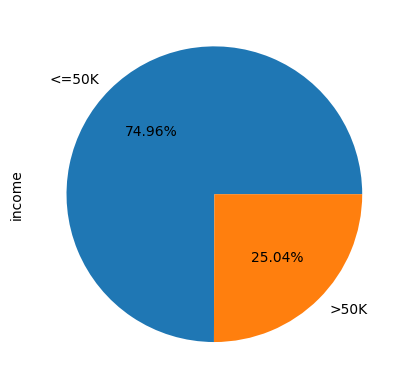

In [38]:
df['income'].value_counts().plot(kind="pie",autopct="%1.2f%%")

Based on the pie graph above, it displays the majority of adults in the dataset as making less than $50k.

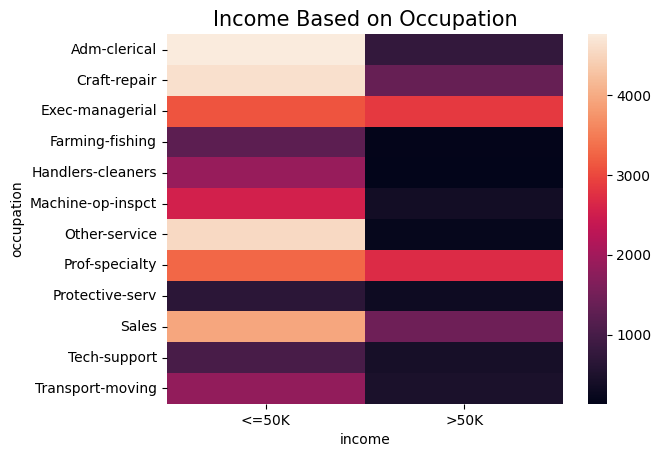

In [39]:
sns.heatmap(pd.crosstab(df['occupation'],df['income']))
plt.title('Income Based on Occupation', fontsize = 15)
plt.show()

Based on the heatmap above, their is a high rate of adults who have an executive management & professional specialty occupations making over $50k.

Compared to the majority of adults in the dataset are in the admin-clerical, craft repair, sales & other service occupations making less than $50K.

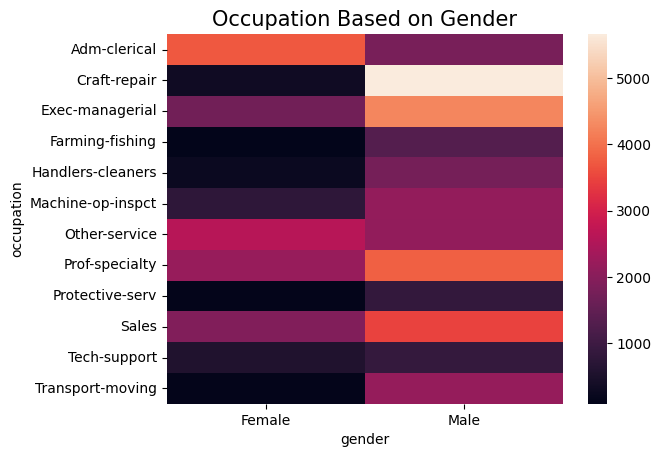

In [40]:
sns.heatmap(pd.crosstab(df['occupation'],df['gender']))
plt.title('Occupation Based on Gender', fontsize = 15)
plt.show()

Based on the heatmap above, this dataset displays a high rate of females having admin-clerical occupations, following other service, professional specialty, sales and executive management. Majority of males are in Craft repair occupations, executive management, following professional specialty then sales.

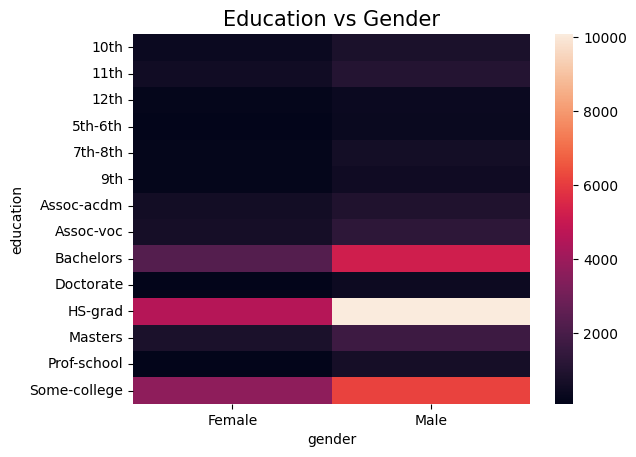

In [41]:
sns.heatmap(pd.crosstab(df['education'],df['gender']))
plt.title('Education vs Gender', fontsize = 15)
plt.show()

Based on the heatmap above, this dataset displays a high rate of male adults have obtained a high school graduate education and bachelors along with some college education. Although, low rates on Associates and Master's education. Majority of adult females have obtained mainly a high school graduate education and some college with a low rate for Bachelors and Masters education.

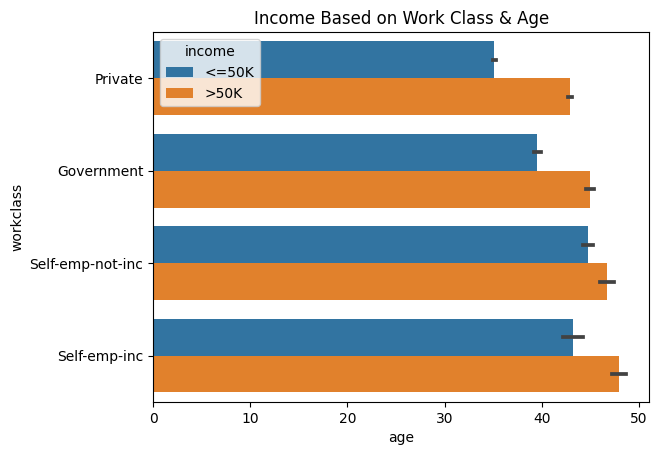

In [42]:
sns.barplot(x=df['age'],y=df['workclass'], hue=df['income'])
plt.title('Income Based on Work Class & Age', fontsize = 12)
plt.show()

- Based on the barplot above, majority of older adults whom are
self employed make over 50K income.
- Whereas, majority of young adults in the private sector
 make less than 50k income.

Text(0.5, 1.0, 'Income Based on Hours & Age')

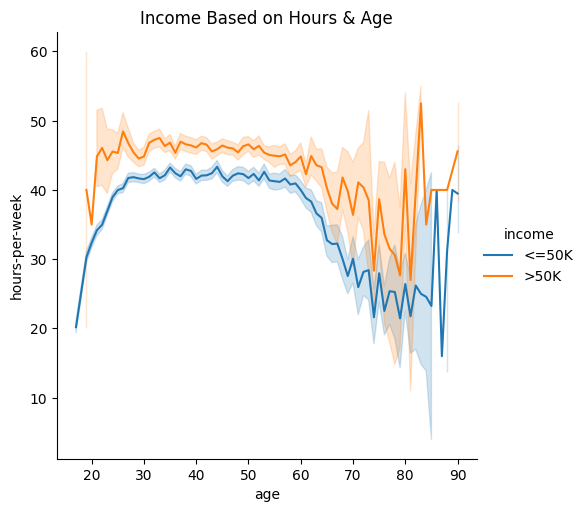

In [43]:
sns.relplot(df, kind="line",
    x="age", y="hours-per-week", hue="income")

plt.title('Income Based on Hours & Age', fontsize = 12)

Based on the graph above, the older in age the less hours per week. The oldest being around 80-90 years of age seems to peak (I would think adults keeping tabs on investments at that point).

There are many analysis one can make with this dataset, based on the visuals above I choose the last two exploratory visuals for key trends. There are notable correlations to income such as attributes of hours per week, age, gender, class and occupation to say the least.